In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('F:\\Program\\git_base\\GitHub\\MyRepo\\DVP_02\\data\\final_data.csv')
data.head(5)

Unnamed: 0                             address  \
0           2  Address: 1160 Mission Street #2007   
1           5       Address: 260 King Street #475   
2           7     Address: 560 Missouri Street #B   
3           9        Address: 350 Missouri Street   
4          11         Address: 3658 Folsom Street   

                                                info  \
0   San FranciscoSales price: 1300000Sales date: ...   
1   San FranciscoSales price: 750000Sales date: 0...   
2   San FranciscoSales price: 1495000Sales date: ...   
3   San FranciscoSales price: 2700000Sales date: ...   
4   San FranciscoSales price: 1530000Sales date: ...   

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       2.0        1043.0   02/17/2016   
1       260 King St UNIT 475        1.0       1.0         903.0   02/17/2016   
2        560 Missouri St # B        4.0       3.0        1425.0   02/17/2016   
3            350 Missouri St        3.0       3.0        2231.0   02/17/2016   
4             3658 Folsom St        3.0       3.0        1300.0   02/17/2016   

   lastsoldprice   latitude   longitude     neighborhood  totalrooms  \
0      1300000.0  37.778705 -122.412635  South of Market         4.0   
1       750000.0  37.777641 -122.393417  South of Market         3.0   
2      1495000.0  37.759198 -122.396516     Potrero Hill         6.0   
3      2700000.0  37.761886 -122.396769     Potrero Hill        10.0   
4      1530000.0  37.740795 -122.413453   Bernal Heights         4.0   

        usecode  yearbuilt  zestimate zindexvalue  zipcode        zpid  
0   Condominium     2007.0  1167508.0     975,700  94103.0  83152781.0  
1   Condominium     2004.0   823719.0     975,700  94107.0  69819817.0  
2   Condominium     2003.0  1708594.0   1,277,600  94107.0  64972847.0  
3  SingleFamily     1927.0  2411236.0   1,277,600  94107.0  15149489.0  
4  SingleFamily     1900.0  1918539.0   1,248,000  94110.0  15161978.0

### z_address - адрес

- близость к центру
- извлечь улицы и/или районы
- если координаты нет, то адрес поможет
- геокодинг
- расстояние до метро (если мы будем иметь датасет станций метро и их координат)

### bathrooms - количество ванных комнат

### bedrooms - количество спальных комнат

### totalrooms - общее количество комнат

### finishedsqft - площадь в квадратных футах (квадратный фут = 0.09 м2)

### latitude, longitude
- посчитать среднюю цены предложений в некотором радиусе!!!
- удаленность от центра, достопремичательностей

### neighborhood - Район

### zipcode - Индекс (код района)

### usecode - тип недвижимости

### yearbuilt - год постройки

### zestimate - предварительная стоимость

## ???

### zindexvalue - ??? (это строка)

## Target
### lastsoldprice - последняя цена

In [3]:
# удалить бессмысленный столбец
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['address'], axis=1)
data = data.drop(['info'], axis=1)
data = data.drop(['lastsolddate'], axis=1)
data = data.drop(['z_address'], axis=1)
data.head(5)

bathrooms  bedrooms  finishedsqft  lastsoldprice   latitude   longitude  \
0        2.0       2.0        1043.0      1300000.0  37.778705 -122.412635   
1        1.0       1.0         903.0       750000.0  37.777641 -122.393417   
2        4.0       3.0        1425.0      1495000.0  37.759198 -122.396516   
3        3.0       3.0        2231.0      2700000.0  37.761886 -122.396769   
4        3.0       3.0        1300.0      1530000.0  37.740795 -122.413453   

      neighborhood  totalrooms       usecode  yearbuilt  zestimate  \
0  South of Market         4.0   Condominium     2007.0  1167508.0   
1  South of Market         3.0   Condominium     2004.0   823719.0   
2     Potrero Hill         6.0   Condominium     2003.0  1708594.0   
3     Potrero Hill        10.0  SingleFamily     1927.0  2411236.0   
4   Bernal Heights         4.0  SingleFamily     1900.0  1918539.0   

  zindexvalue  zipcode        zpid  
0     975,700  94103.0  83152781.0  
1     975,700  94107.0  69819817.0  
2   1,277,600  94107.0  64972847.0  
3   1,277,600  94107.0  15149489.0  
4   1,248,000  94110.0  15161978.0

In [4]:
data.shape

(11330, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 14 columns):
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zestimate        11330 non-null float64
zindexvalue      11330 non-null object
zipcode          11330 non-null float64
zpid             11330 non-null float64
dtypes: float64(11), object(3)
memory usage: 1.2+ MB


In [6]:
data.describe(include='all')

bathrooms      bedrooms  finishedsqft  lastsoldprice      latitude  \
count   11330.000000  11330.000000  11330.000000   1.133000e+04  11330.000000   
unique           NaN           NaN           NaN            NaN           NaN   
top              NaN           NaN           NaN            NaN           NaN   
freq             NaN           NaN           NaN            NaN           NaN   
mean        1.980229      2.614475   1585.420918   1.263928e+06     37.759711   
std         1.047358      1.299457    921.978245   1.042079e+06      0.025578   
min         0.500000      0.000000      1.000000   5.350000e+02     37.708170   
25%         1.000000      2.000000   1019.000000   7.292500e+05     37.739286   
50%         2.000000      2.000000   1362.000000   9.900000e+05     37.760513   
75%         2.000000      3.000000   1876.000000   1.450000e+06     37.781386   
max        14.000000     20.000000  27275.000000   2.388900e+07     37.806083   

           longitude neighborhood    totalrooms       usecode     yearbuilt  \
count   11330.000000        11330  11330.000000         11330  11330.000000   
unique           NaN           71           NaN            10           NaN   
top              NaN      Mission           NaN  SingleFamily           NaN   
freq             NaN          540           NaN          5803           NaN   
mean     -122.436518          NaN      6.111562           NaN   1948.498147   
std         0.030743          NaN     12.125819           NaN     37.911196   
min      -122.510726          NaN      1.000000           NaN   1860.000000   
25%      -122.455157          NaN      4.000000           NaN   1916.000000   
50%      -122.432510          NaN      5.000000           NaN   1940.000000   
75%      -122.413359          NaN      7.000000           NaN   1986.000000   
max      -122.381201          NaN   1264.000000           NaN   2016.000000   

           zestimate zindexvalue       zipcode          zpid  
count   1.133000e+04       11330  11330.000000  1.133000e+04  
unique           NaN         139           NaN           NaN  
top              NaN   1,167,700           NaN           NaN  
freq             NaN         469           NaN           NaN  
mean    1.565695e+06         NaN  94116.912004  3.689973e+07  
std     1.229417e+06         NaN      9.400877  7.800741e+07  
min     4.323850e+05         NaN  94102.000000  1.506329e+07  
25%     9.052375e+05         NaN  94110.000000  1.510847e+07  
50%     1.230758e+06         NaN  94115.000000  1.515697e+07  
75%     1.731170e+06         NaN  94123.000000  5.970040e+07  
max     1.553325e+07         NaN  94158.000000  2.146999e+09

In [7]:
data.isnull().sum()

bathrooms        0
bedrooms         0
finishedsqft     0
lastsoldprice    0
latitude         0
longitude        0
neighborhood     0
totalrooms       0
usecode          0
yearbuilt        0
zestimate        0
zindexvalue      0
zipcode          0
zpid             0
dtype: int64

In [8]:
data['zindexvalue'] = data['zindexvalue'].str.replace(',', '').astype(int)

In [9]:
data['zindexvalue'].describe()

count    1.133000e+04
mean     1.320205e+06
std      5.848170e+05
min      6.881000e+05
25%      9.829000e+05
50%      1.211900e+06
75%      1.480400e+06
max      5.333500e+06
Name: zindexvalue, dtype: float64

In [10]:
data.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [11]:
t_data = data[['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms', 'totalrooms', 'lastsoldprice']]

In [12]:
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice
0        1043.0  1167508.0        2.0       2.0         4.0      1300000.0
1         903.0   823719.0        1.0       1.0         3.0       750000.0
2        1425.0  1708594.0        4.0       3.0         6.0      1495000.0
3        2231.0  2411236.0        3.0       3.0        10.0      2700000.0
4        1300.0  1918539.0        3.0       3.0         4.0      1530000.0

In [13]:
t_data = t_data.query('finishedsqft < 25000')

In [14]:
import math

In [15]:
# math.ceil - округление числа в бОльшую сторону
# math.floor - округление числа в меньшую сторону

In [16]:
t_data['bathrooms'] = t_data['bathrooms'].apply(math.ceil).astype(int)
t_data['bedrooms'] = t_data['bedrooms'].apply(math.ceil).astype(int)

In [17]:
t_data.describe()

finishedsqft     zestimate     bathrooms      bedrooms    totalrooms  \
count  11329.000000  1.132900e+04  11329.000000  11329.000000  11329.000000   
mean    1583.153323  1.565237e+06      2.049078      2.614529      6.111572   
std      889.862399  1.228504e+06      1.105357      1.299502     12.126354   
min        1.000000  4.323850e+05      1.000000      0.000000      1.000000   
25%     1019.000000  9.052300e+05      1.000000      2.000000      4.000000   
50%     1362.000000  1.230675e+06      2.000000      2.000000      5.000000   
75%     1876.000000  1.730689e+06      2.000000      3.000000      7.000000   
max    10236.000000  1.553325e+07     14.000000     20.000000   1264.000000   

       lastsoldprice  
count   1.132900e+04  
mean    1.263987e+06  
std     1.042106e+06  
min     5.350000e+02  
25%     7.300000e+05  
50%     9.900000e+05  
75%     1.450000e+06  
max     2.388900e+07

In [18]:
# Отсеять!
t_data = t_data.query('bathrooms < 14')

In [19]:
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice
0        1043.0  1167508.0          2         2         4.0      1300000.0
1         903.0   823719.0          1         1         3.0       750000.0
2        1425.0  1708594.0          4         3         6.0      1495000.0
3        2231.0  2411236.0          3         3        10.0      2700000.0
4        1300.0  1918539.0          3         3         4.0      1530000.0

In [20]:
# t_data.loc[6743]

In [21]:
t_data = t_data.drop([6743])

In [22]:
# Отсеять!
t_data.query('bedrooms == 20')

Empty DataFrame
Columns: [finishedsqft, zestimate, bathrooms, bedrooms, totalrooms, lastsoldprice]
Index: []

In [23]:
# Интересный кейс
# t_data.query('bathrooms > bedrooms')

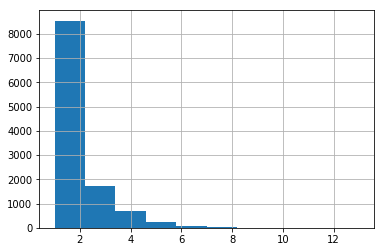

In [24]:
t_data['bathrooms'].hist()

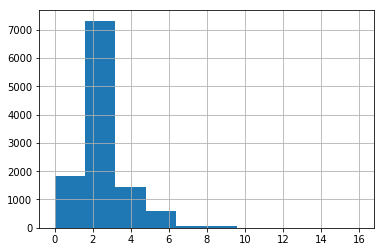

In [25]:
t_data['bedrooms'].hist()

In [26]:
data.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Раздел:</b> Начало урока DVP_03
</div>

In [27]:
data.shape

(11330, 14)

In [28]:
t_data.shape

(11325, 6)

In [29]:
data.query('bedrooms > totalrooms').shape[0] / t_data.shape[0]

0.0018543046357615894

In [30]:
t_data.shape

(11325, 6)

In [31]:
t_data = t_data[(t_data['bedrooms'] + t_data['bathrooms']) <= t_data['totalrooms']]

In [32]:
t_data.shape

(10544, 6)

In [33]:
# Отсеять
t_data = t_data.query('(bedrooms <= totalrooms) or (bathrooms <= totalrooms)')

In [34]:
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice
0        1043.0  1167508.0          2         2         4.0      1300000.0
1         903.0   823719.0          1         1         3.0       750000.0
3        2231.0  2411236.0          3         3        10.0      2700000.0
5        1250.0   703392.0          1         2         5.0       460000.0
6        1032.0   741715.0          1         3         6.0       532000.0

In [35]:
data.shape

(11330, 14)

In [36]:
t_data.shape

(10544, 6)

In [37]:
t_data.columns

Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms', 'totalrooms',
       'lastsoldprice'],
      dtype='object')

In [38]:
X_columns = t_data.columns[:-2]
y_column = t_data.columns[-1]

X_columns, y_column

(Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms'], dtype='object'),
 'lastsoldprice')

In [39]:
X = t_data[X_columns]
y = t_data[y_column]

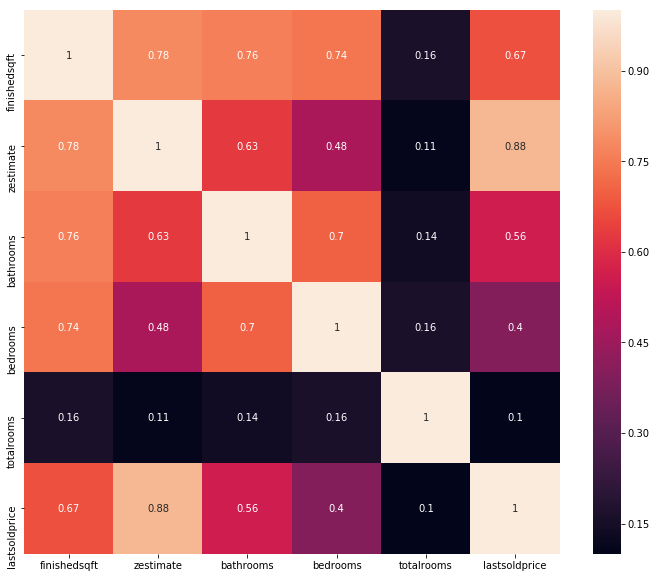

In [40]:
correlation_matrix = t_data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Классическое разделение обучаемой и тестовой выборки - 70/30

In [41]:
X_new = X[['finishedsqft', 'bathrooms', 'bedrooms']]
X_new.head(5)

finishedsqft  bathrooms  bedrooms
0        1043.0          2         2
1         903.0          1         1
3        2231.0          3         3
5        1250.0          1         2
6        1032.0          1         3

In [127]:
X = t_data[X_columns]
y = t_data[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# scaler = preprocessing.MinMaxScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

# scaler = preprocessing.StandardScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

**MinMax** - (Значение - Минимальным значением выборки) / (Максимальное значение выборки - Минимальное значение выборки)

**Standart** - (Значение - среднее значение выборки) / среднее квадратическое отклонение 

In [155]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
X.describe().iloc[:4]

finishedsqft     zestimate     bathrooms      bedrooms
count  10544.000000  1.054400e+04  10544.000000  10544.000000
mean    1546.205709  1.521151e+06      1.944803      2.529590
std      860.681241  1.163350e+06      0.988307      1.224678
min        1.000000  4.323850e+05      1.000000      0.000000

In [159]:
np.mean(X_new, axis=0)

array([-2.02165042e-17,  1.75209703e-17,  6.87361144e-17, -6.19972797e-17])

In [160]:
np.std(X_new, axis=0)

array([1., 1., 1., 1.])

In [156]:
X_new

array([[-0.58468751, -0.3040015 ,  0.055853  , -0.43245285],
       [-0.74735707, -0.59953203, -0.95602671, -1.24903287],
       [ 0.7956799 ,  0.76514145,  1.0677327 ,  0.38412717],
       ...,
       [-0.77989098, -0.75817803, -0.95602671, -0.43245285],
       [-0.98671371, -0.70313607, -0.95602671, -0.43245285],
       [-0.0083725 , -0.48060083,  0.055853  ,  0.38412717]])

In [162]:
X_new

array([[-0.58468751, -0.3040015 ,  0.055853  , -0.43245285],
       [-0.74735707, -0.59953203, -0.95602671, -1.24903287],
       [ 0.7956799 ,  0.76514145,  1.0677327 ,  0.38412717],
       ...,
       [-0.77989098, -0.75817803, -0.95602671, -0.43245285],
       [-0.98671371, -0.70313607, -0.95602671, -0.43245285],
       [-0.0083725 , -0.48060083,  0.055853  ,  0.38412717]])

In [161]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=30)

In [147]:
X.iloc[0]

finishedsqft       1043.0
zestimate       1167508.0
bathrooms             2.0
bedrooms              2.0
Name: 0, dtype: float64

In [139]:
X.shape

(10544, 4)

In [140]:
X_train.shape, X_test.shape

((8435, 4), (2109, 4))

In [142]:
X_train # random_state = 30

array([[0.15876893, 0.06090835, 0.125     , 0.1875    ],
       [0.11714704, 0.05455918, 0.125     , 0.125     ],
       [0.13453835, 0.03891127, 0.125     , 0.125     ],
       ...,
       [0.07298486, 0.02586825, 0.        , 0.0625    ],
       [0.15222277, 0.09608328, 0.25      , 0.1875    ],
       [0.07318026, 0.01476001, 0.125     , 0.125     ]])

In [46]:
X_train.head(5)

finishedsqft  zestimate  bathrooms  bedrooms
2393        1626.0  1352154.0          2         3
6111        1200.0  1256276.0          2         2
3584        1378.0  1019979.0          2         2
8072         581.0   653365.0          1         1
3700        1208.0  1433962.0          2         2

In [47]:
X_train.head(5) # random_state = 100

finishedsqft  zestimate  bathrooms  bedrooms
2393        1626.0  1352154.0          2         3
6111        1200.0  1256276.0          2         2
3584        1378.0  1019979.0          2         2
8072         581.0   653365.0          1         1
3700        1208.0  1433962.0          2         2

In [48]:
X_test.head(5)

finishedsqft  zestimate  bathrooms  bedrooms
7466        3294.0  1902797.0          4         4
9720        2894.0  3140789.0          2         4
7020        2100.0  1810226.0          2         6
6813        1400.0  1350528.0          1         2
489          677.0   818427.0          1         1

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.8199314378189777
RMSE: 	 448840.67964044755
MAE: 	 265237.5196473942


R2: 	 0.8199314378189773

RMSE: 	 448840.6796404482

MAE: 	 265237.51964739535

In [146]:
X.columns

Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms'], dtype='object')

In [164]:
estimator.coef_

array([-29214.8245507 , 859706.72967237,  57971.74954943, -43706.50418382])

array([[0.10092819, 0.04868084, 0.125     , 0.25      ]])

In [150]:
estimator.predict(scaler.transform([[1034, 1167508, 2, 4]]))

array([932716.49112409])

In [50]:
X_columns

Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms'], dtype='object')

In [51]:
estimator.coef_

array([-3.39454477e+01,  7.39027663e-01,  5.86604370e+04, -3.56898582e+04])

In [52]:
estimator.intercept_

130433.93417902594

In [53]:
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice
0        1043.0  1167508.0          2         2         4.0      1300000.0
1         903.0   823719.0          1         1         3.0       750000.0
3        2231.0  2411236.0          3         3        10.0      2700000.0
5        1250.0   703392.0          1         2         5.0       460000.0
6        1032.0   741715.0          1         3         6.0       532000.0

In [54]:
t_data.index

Int64Index([    0,     1,     3,     5,     6,     7,     8,     9,    10,
               11,
            ...
            11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327, 11328,
            11329],
           dtype='int64', length=10544)

In [55]:
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice
0        1043.0  1167508.0          2         2         4.0      1300000.0
1         903.0   823719.0          1         1         3.0       750000.0
3        2231.0  2411236.0          3         3        10.0      2700000.0
5        1250.0   703392.0          1         2         5.0       460000.0
6        1032.0   741715.0          1         3         6.0       532000.0

In [56]:
t_data['neighborhood'] = data.loc[t_data.index, 'neighborhood']
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice  \
0        1043.0  1167508.0          2         2         4.0      1300000.0   
1         903.0   823719.0          1         1         3.0       750000.0   
3        2231.0  2411236.0          3         3        10.0      2700000.0   
5        1250.0   703392.0          1         2         5.0       460000.0   
6        1032.0   741715.0          1         3         6.0       532000.0   

      neighborhood  
0  South of Market  
1  South of Market  
3     Potrero Hill  
5   Crocker Amazon  
6        Oceanview

In [57]:
t_data['neighborhood'].unique()

array(['South of Market', 'Potrero Hill', 'Crocker Amazon', 'Oceanview',
       'Mission Terrace', 'Noe Valley', 'Hayes Valley', 'Portola',
       'Eureka Valley - Dolores Heights - Castro', 'Lake', 'Inner Sunset',
       'Sunnyside', 'Van Ness - Civic Center', 'Mission', 'Nob Hill',
       'Bernal Heights', 'Lower Pacific Heights', 'Central Richmond',
       'Outer Sunset', 'Bayview', 'Westwood Highlands',
       'Forest Hill Extension', 'Lakeshore', 'Corona Heights',
       'Central Sunset', 'Pacific Heights', 'Lone Mountain',
       'North Panhandle', 'Diamond Heights', 'Downtown',
       'Western Addition', 'Presidio Heights', 'Midtown Terrace',
       'Parnassus - Ashbury', 'Silver Terrace', 'South Beach',
       'Glen Park', 'Outer Mission', 'Yerba Buena', 'Outer Parkside',
       'Ingleside Heights', 'Outer Richmond', 'Telegraph Hill',
       'Visitacion Valley', 'Cow Hollow', 'Excelsior', 'Twin Peaks',
       'Haight-Ashbury', 'Ingleside', 'Marina', 'Merced Heights',
       'Ru

**Zest** - 'это независимая оценка, туда очевидно входят и площадь и положение и количество комнат и район, надо оставить его и найти какой то фактор который эта оценка не учитывает

In [75]:
from sklearn import preprocessing

In [113]:
# t_data['neighborhood'].value_counts()

In [81]:
t_data.shape

(10544, 7)

In [88]:
neighborhood = t_data['neighborhood'].get_values().reshape(-1, 1)

In [89]:
# One-hot encoding
oh_encoder = preprocessing.OneHotEncoder()
oh_encoder.fit(neighborhood)
oh_result = oh_encoder.transform(neighborhood).toarray()
oh_result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [98]:
neighborhood_columns = ['neighborhood_{}'.format(i) for i in range(oh_result.shape[1])]

In [106]:
neighborhood_df = pd.DataFrame(oh_result, columns=neighborhood_columns)
neighborhood_df.index = t_data.index

In [109]:
t_data_neib = pd.concat([t_data, neighborhood_df], axis=1)
t_data_neib = t_data_neib.drop(['neighborhood'], axis=1)
t_data_neib.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice  \
0        1043.0  1167508.0          2         2         4.0      1300000.0   
1         903.0   823719.0          1         1         3.0       750000.0   
3        2231.0  2411236.0          3         3        10.0      2700000.0   
5        1250.0   703392.0          1         2         5.0       460000.0   
6        1032.0   741715.0          1         3         6.0       532000.0   

      neighborhood  neighborhood_0  neighborhood_1  neighborhood_2  ...  \
0  South of Market             0.0             0.0             0.0  ...   
1  South of Market             0.0             0.0             0.0  ...   
3     Potrero Hill             0.0             0.0             0.0  ...   
5   Crocker Amazon             0.0             0.0             0.0  ...   
6        Oceanview             0.0             0.0             0.0  ...   

   neighborhood_61  neighborhood_62  neighborhood_63  neighborhood_64  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
5              0.0              0.0              0.0              0.0   
6              0.0              0.0              0.0              0.0   

   neighborhood_65  neighborhood_66  neighborhood_67  neighborhood_68  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
5              0.0              0.0              0.0              0.0   
6              0.0              0.0              0.0              0.0   

   neighborhood_69  neighborhood_70  
0              0.0              0.0  
1              0.0              0.0  
3              0.0              0.0  
5              0.0              0.0  
6              0.0              0.0  

[5 rows x 78 columns]

In [114]:
t_data_neib.columns

Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms', 'totalrooms',
       'lastsoldprice', 'neighborhood_0', 'neighborhood_1', 'neighborhood_2',
       'neighborhood_3', 'neighborhood_4', 'neighborhood_5', 'neighborhood_6',
       'neighborhood_7', 'neighborhood_8', 'neighborhood_9', 'neighborhood_10',
       'neighborhood_11', 'neighborhood_12', 'neighborhood_13',
       'neighborhood_14', 'neighborhood_15', 'neighborhood_16',
       'neighborhood_17', 'neighborhood_18', 'neighborhood_19',
       'neighborhood_20', 'neighborhood_21', 'neighborhood_22',
       'neighborhood_23', 'neighborhood_24', 'neighborhood_25',
       'neighborhood_26', 'neighborhood_27', 'neighborhood_28',
       'neighborhood_29', 'neighborhood_30', 'neighborhood_31',
       'neighborhood_32', 'neighborhood_33', 'neighborhood_34',
       'neighborhood_35', 'neighborhood_36', 'neighborhood_37',
       'neighborhood_38', 'neighborhood_39', 'neighborhood_40',
       'neighborhood_41', 'neighborhood_42', 'ne

In [117]:
X = t_data_neib.drop(['lastsoldprice', 'totalrooms'], axis=1)
y = t_data_neib[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение

y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.8204309035718418
RMSE: 	 448217.76074609376
MAE: 	 265497.9172797947


R2: 	 0.8199314378189773

RMSE: 	 448840.6796404482

MAE: 	 265237.51964739535

In [125]:
X.columns[:4]

Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms'], dtype='object')

In [124]:
estimator.coef_[:4]

array([-3.34013124e+01,  7.29889273e-01,  5.98722741e+04, -3.36090340e+04])

In [126]:
# estimator.coef_[-71:]

In [119]:
estimator.intercept_

125649.72976393322

In [168]:
for n, vect in zip(neighborhood[:10], label_result[:10]):
    print(n, '!!!!', vect)

['South of Market'] !!!! 59
['South of Market'] !!!! 59
['Potrero Hill'] !!!! 53
['Crocker Amazon'] !!!! 8
['Oceanview'] !!!! 44
['Mission Terrace'] !!!! 37
['Noe Valley'] !!!! 40
['Hayes Valley'] !!!! 19
['Portola'] !!!! 52
['South of Market'] !!!! 59


In [166]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(neighborhood)
label_result = label_encoder.transform(neighborhood)
print('LABEL')

LABEL


/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
# PolynomialFeatures
poly_encoder = preprocessing.PolynomialFeatures(degree=2)
poly_encoder.fit(X)
X_poly = poly_encoder.transform(X)

In [178]:
X_poly

array([[1.000000e+00, 1.043000e+03, 1.167508e+06, ..., 4.000000e+00,
        4.000000e+00, 4.000000e+00],
       [1.000000e+00, 9.030000e+02, 8.237190e+05, ..., 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.231000e+03, 2.411236e+06, ..., 9.000000e+00,
        9.000000e+00, 9.000000e+00],
       ...,
       [1.000000e+00, 8.750000e+02, 6.391670e+05, ..., 1.000000e+00,
        2.000000e+00, 4.000000e+00],
       [1.000000e+00, 6.970000e+02, 7.031970e+05, ..., 1.000000e+00,
        2.000000e+00, 4.000000e+00],
       [1.000000e+00, 1.539000e+03, 9.620710e+05, ..., 4.000000e+00,
        6.000000e+00, 9.000000e+00]])

In [175]:
X_poly.shape

(10544, 15)

In [59]:
t_data.describe()

finishedsqft     zestimate     bathrooms      bedrooms    totalrooms  \
count  10544.000000  1.054400e+04  10544.000000  10544.000000  10544.000000   
mean    1546.205709  1.521151e+06      1.944803      2.529590      6.154685   
std      860.681241  1.163350e+06      0.988307      1.224678     12.552561   
min        1.000000  4.323850e+05      1.000000      0.000000      1.000000   
25%     1001.000000  8.936368e+05      1.000000      2.000000      4.000000   
50%     1338.500000  1.211151e+06      2.000000      2.000000      5.000000   
75%     1832.000000  1.695708e+06      2.000000      3.000000      7.000000   
max    10236.000000  1.553325e+07      9.000000     16.000000   1264.000000   

       lastsoldprice  
count   1.054400e+04  
mean    1.226408e+06  
std     9.764215e+05  
min     5.350000e+02  
25%     7.250000e+05  
50%     9.750000e+05  
75%     1.410000e+06  
max     2.388900e+07

In [60]:
t_data.columns

Index(['finishedsqft', 'zestimate', 'bathrooms', 'bedrooms', 'totalrooms',
       'lastsoldprice', 'neighborhood'],
      dtype='object')

In [72]:
t_data.head(5)

finishedsqft  zestimate  bathrooms  bedrooms  totalrooms  lastsoldprice  \
0        1043.0  1167508.0          2         2         4.0      1300000.0   
1         903.0   823719.0          1         1         3.0       750000.0   
3        2231.0  2411236.0          3         3        10.0      2700000.0   
5        1250.0   703392.0          1         2         5.0       460000.0   
6        1032.0   741715.0          1         3         6.0       532000.0   

      neighborhood  
0  South of Market  
1  South of Market  
3     Potrero Hill  
5   Crocker Amazon  
6        Oceanview

In [62]:
from sklearn import preprocessing

In [64]:
# scaler = preprocessing.MinMaxScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

In [65]:
# scaler = preprocessing.StandardScaler()
# scaler.fit(test_val)
# scaler.transform(test_val)

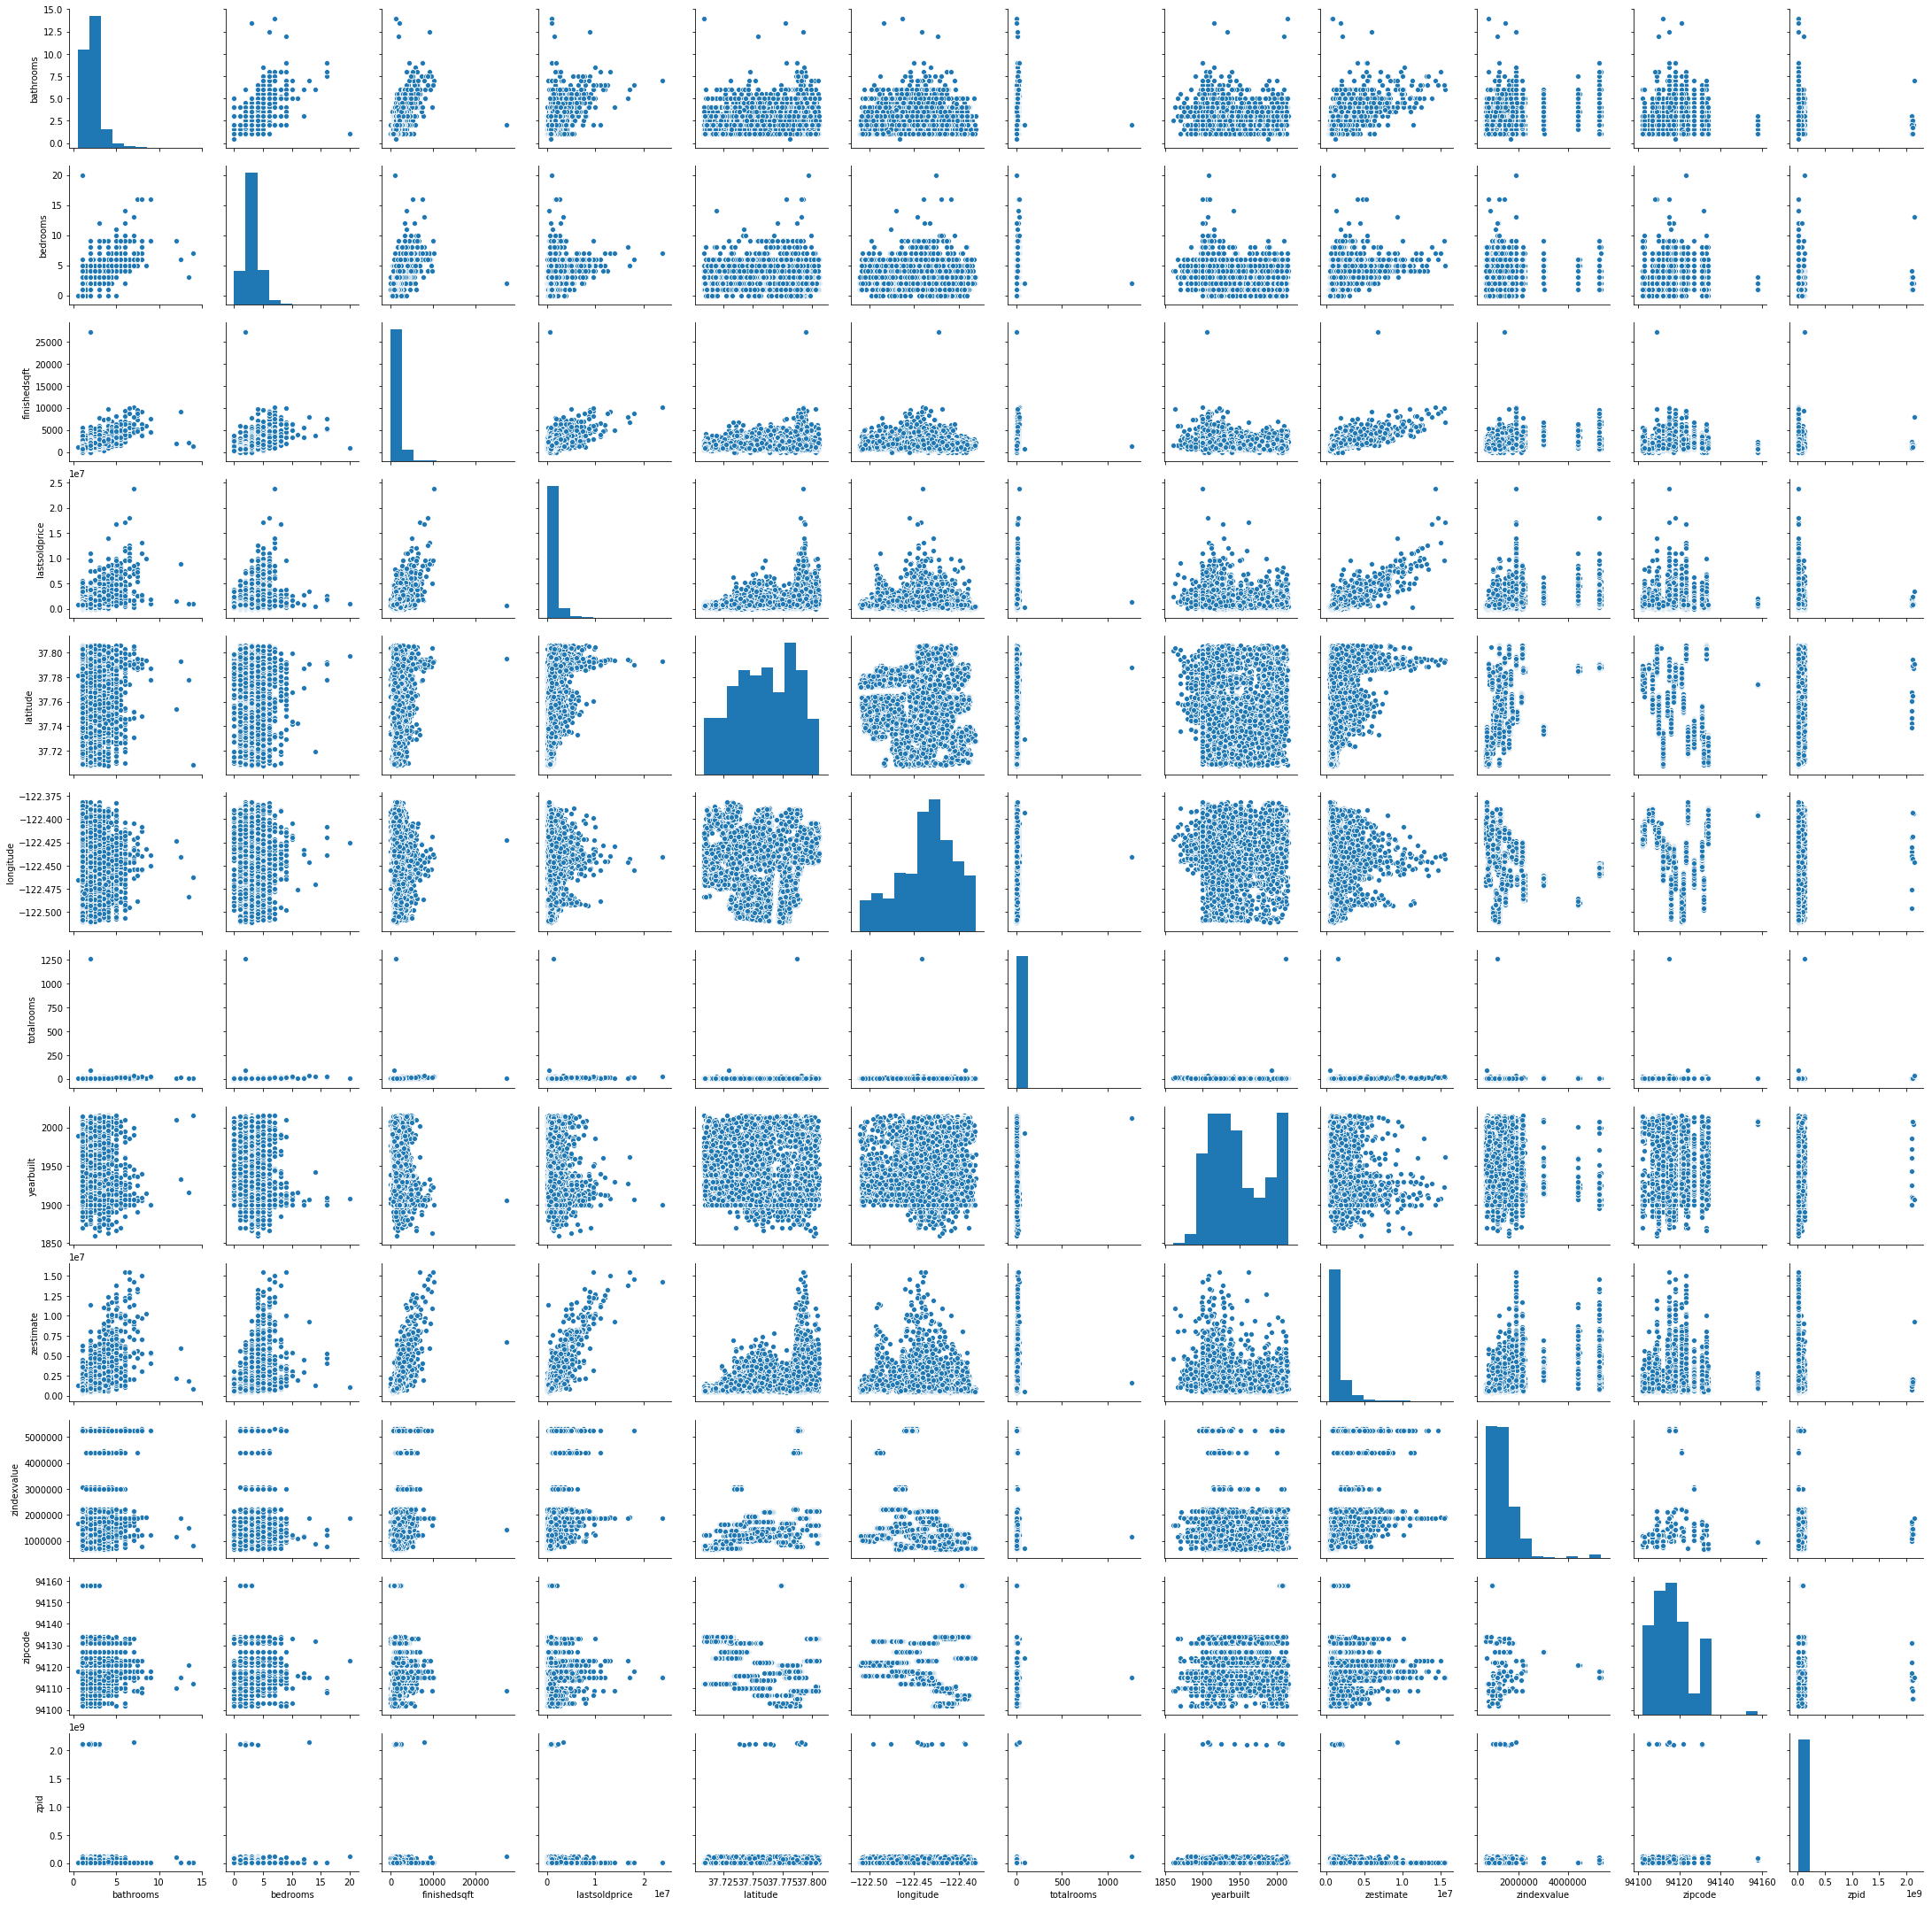

In [66]:
sns.pairplot(data)

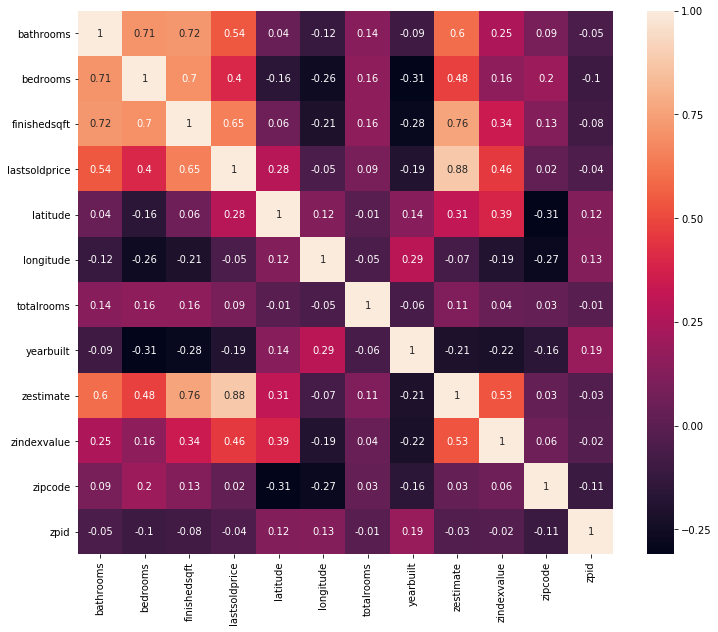

In [67]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

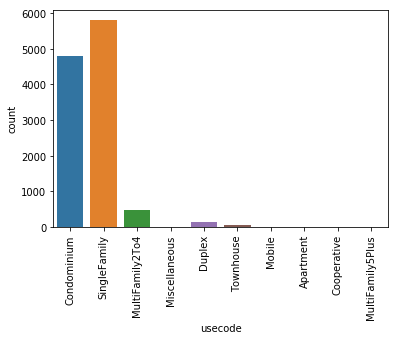

In [68]:
sns.countplot(x='usecode', data=data)
plt.xticks(rotation=90)

In [69]:
from sklearn.model_selection import train_test_split
train_test_split(X, y, test_size=0.2, random_state=30)

[       finishedsqft  zestimate  bathrooms  bedrooms
 2393         1626.0  1352154.0          2         3
 6111         1200.0  1256276.0          2         2
 3584         1378.0  1019979.0          2         2
 8072          581.0   653365.0          1         1
 3700         1208.0  1433962.0          2         2
 2734         1350.0  1079011.0          1         2
 4771          801.0  1005861.0          1         1
 2812         1718.0  1603940.0          2         2
 9347         1105.0  1263006.0          2         2
 4439         1300.0   709986.0          2         3
 6875          602.0   618807.0          1         1
 1424          759.0   819177.0          1         1
 9362         1175.0  1257610.0          1         3
 2039         1350.0  1160744.0          1         2
 2204         1115.0  1138486.0          1         1
 4651          610.0   728328.0          1         1
 2419         1532.0  1444384.0          3         3
 10728        1078.0  1067861.0          1    

In [70]:
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
regression_model = GridSearchCV(estimator, grid_params, cv=5, n_jobs=-1, verbose=1)
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

NameError: name 'grid_params' is not defined

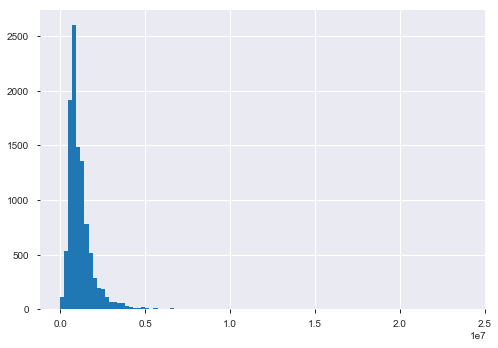

In [185]:
t_data['lastsoldprice'].hist(bins=100)

In [200]:
t_data['lastsoldprice'].mean(), t_data['lastsoldprice'].median()

(1226408.0096737482, 975000.0)

In [209]:
t_data[t_data['neighborhood'] == 'South of Market']['lastsoldprice'].mean()

919382.3284823284

In [187]:
lastsoldprice = t_data['lastsoldprice'].copy()

In [191]:
lastsoldprice.loc[[0, 5, 10]] = 10

In [211]:
lastsoldprice.loc[:30] = None

In [212]:
lastsoldprice.loc[:30] = lastsoldprice.mean()

In [213]:
np.mean(old_vals - lastsoldprice.loc[:30])

55952.77824454385

In [195]:
old_vals = t_data['lastsoldprice'].loc[:30]

In [196]:
lastsoldprice

0              NaN
1              NaN
3              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
31        700000.0
           ...    
11298     872500.0
11300    1600000.0
11301    1625000.0
11302    2050000.0
11303     885000.0
11304     960000.0
11305     825000.0
11306    1065000.0
11307    1925000.0
11308    1250000.0
11309    1950000.0
11310     609000.0
11311    2350000.0
11312    1770000.0
11314    1350000.0
11315     725000.0
11316     850000.0
11317     860000.0
11318     885000.0
11319    1600000.0
11320     760000.0
11321     22

> **pip install pandas_profiling**

In [179]:
import pandas_profiling

In [ ]:
data.shape

In [ ]:
np.inf # Бесконечность

In [ ]:
# Удаление дубликатов
data.drop_duplicates().shape

In [180]:
data.profile_report()